In [ ]:

# What groups of patrons are similar?
# ratings_clean.csv has been used for this task.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("ratings_clean.csv")
data.drop(data[data['rating'] == -999].index, inplace=True) 
data['rating'].drop_duplicates().reset_index(drop=True)
data.head()

id     item  rating    datetime
0   0  title_0       4  2021-04-17
1   0  title_1       3  2021-01-09
2   0  title_2       5  2021-05-21
3   0  title_3       4  2021-05-29
4   0  title_4       2  2021-01-24

In [2]:
row_count = len(data)
print("Row count:", row_count)

Row count: 3618197


In [40]:
# cluster based on average rating and number of ratings
user_features = data.groupby('id').agg({'rating': 'mean', 'item': 'count'})

In [41]:
scaler = StandardScaler()
user_features_scaled = scaler.fit_transform(user_features)

In [48]:
k = 4  # Chose 4 based on the elbow plot.
kmeans = KMeans(n_clusters=k, random_state=0)
user_features['cluster'] = kmeans.fit_predict(user_features_scaled)

C:\Users\hdili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
# previously cluster 4 had the outliers (-999)
outlier_cluster = 4
outliers = data[data['id'].isin(user_features[user_features['cluster'] == outlier_cluster].index)]
print(outliers)

Empty DataFrame
Columns: [id, item, rating, datetime]
Index: []


In [50]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=user_features.columns[:-1])

for i in range(k):
    cluster = user_features[user_features['cluster'] == i]
    print(f"Cluster {i} - Size: {len(cluster)}")
    print("Cluster Center:")
    print(cluster_centers.loc[i])
    print()

Cluster 0 - Size: 21805
Cluster Center:
rating     3.552994
item      30.232746
Name: 0, dtype: float64

Cluster 1 - Size: 18895
Cluster Center:
rating     3.689541
item      69.438055
Name: 1, dtype: float64

Cluster 2 - Size: 18585
Cluster Center:
rating     2.672552
item      69.284837
Name: 2, dtype: float64

Cluster 3 - Size: 14136
Cluster Center:
rating     2.438923
item      25.418143
Name: 3, dtype: float64



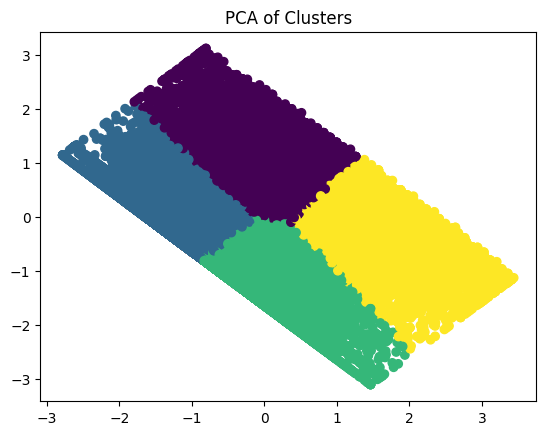

In [51]:
# Example of visualizing clusters with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
user_features_pca = pca.fit_transform(user_features_scaled)
plt.scatter(user_features_pca[:, 0], user_features_pca[:, 1], c=user_features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.show()


C:\Users\hdili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

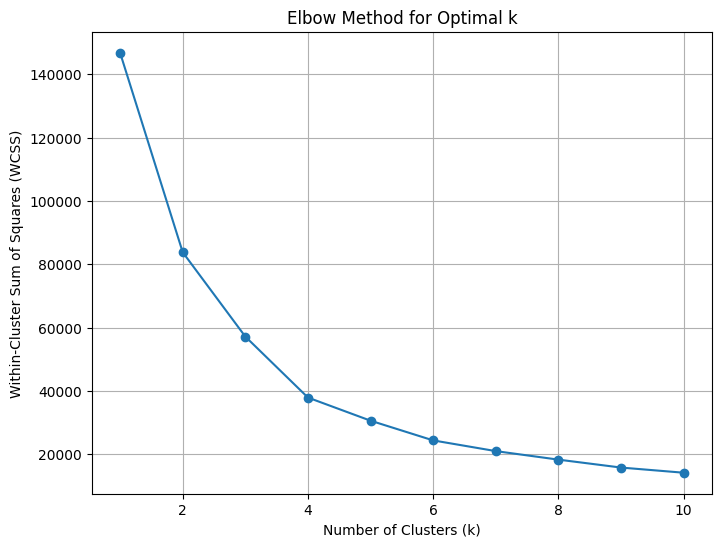

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


# Create a list to store the WCSS (Within-Cluster Sum of Squares) for each k
wcss = []

# Define a range of k values to test
k_range = range(1, 11)  # You can adjust this range as needed

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(user_features_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Create an elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [ ]:
# Cluster 0:

# Size: 21,805 users
# Cluster Center:
# Average rating: 3.55
# Average number of items rated: 30.23
# This cluster represents a group of users who, on average, have ratings around 3.55 and have rated an average of 30.23 items. These users seem to be moderately active and have a moderate rating tendency.

# Cluster 1:

# Size: 18,895 users
# Cluster Center:
# Average rating: 3.69
# Average number of items rated: 69.44
# Cluster 1 consists of users with relatively high average ratings (3.69) and have rated a relatively high number of items (69.44) on average. These users might be considered highly active and generally give positive ratings.

# Cluster 2:

# Size: 18,585 users
# Cluster Center:
# Average rating: 2.67
# Average number of items rated: 69.28
# In Cluster 2, users have a lower average rating (2.67) and have rated a relatively high number of items (69.28) on average. This cluster might represent a group of users who are more active but tend to give lower ratings.

# Cluster 3:

# Size: 14,136 users
# Cluster Center:
# Average rating: 2.44
# Average number of items rated: 25.42
# Cluster 3 consists of users with relatively low average ratings (2.44) and have rated fewer items (25.42) on average. These users may be more critical in their ratings or less active compared to other clusters.